In [10]:
from models_kan import create_model
import torch.optim as optim
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from engine import train_one_epoch, evaluate

KAN_model = create_model(
    model_name='deit_tiny_patch16_224_KAN',
    pretrained=False,
    hdim_kan=192,
    num_classes=10,
    drop_rate=0.0,
    drop_path_rate=0.05,
    img_size=32,
    batch_size=144
)

# dataset CIFAR10

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=144,
                                          shuffle=True, num_workers=2)


testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=144, shuffle=False, num_workers=2)

# classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# optimizer
optimizer = optim.SGD(KAN_model.parameters(), lr=0.001, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
KAN_model.to(device)

# train using engine.py

losses = []

for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = KAN_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

# evaluate
test_stats = evaluate(testloader, KAN_model, device=device)
print(
    f"Accuracy of the network on the {len(testset)} test images: {test_stats['acc1']:.1f}%")

print('Finished Training')

{'hdim_kan': 192, 'num_classes': 10, 'drop_rate': 0.0, 'drop_path_rate': 0.05, 'img_size': 32, 'batch_size': 144}


d:\Docs\GitHub\Vision-KAN\engine.py:97: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
C:\Users\idirt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\amp\autocast_mode.py:265: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Test:  [ 0/70]  eta: 0:07:48  loss: 2.2048 (2.2048)  acc1: 22.2222 (22.2222)  acc5: 68.7500 (68.7500)  time: 6.6924  data: 6.5413
Test:  [10/70]  eta: 0:01:05  loss: 2.2124 (2.2052)  acc1: 20.1389 (19.6338)  acc5: 68.0556 (67.4874)  time: 1.0975  data: 0.5947
Test:  [20/70]  eta: 0:00:41  loss: 2.2145 (2.2139)  acc1: 18.7500 (18.7831)  acc5: 67.3611 (66.3029)  time: 0.5420  data: 0.0000
Test:  [30/70]  eta: 0:00:29  loss: 2.2145 (2.2133)  acc1: 18.0556 (18.5260)  acc5: 65.9722 (66.4651)  time: 0.5225  data: 0.0014
Test:  [40/70]  eta: 0:00:19  loss: 2.2091 (2.2133)  acc1: 18.0556 (18.4621)  acc5: 65.9722 (66.3110)  time: 0.4825  data: 0.0022
Test:  [50/70]  eta: 0:00:12  loss: 2.2024 (2.2111)  acc1: 18.7500 (18.6275)  acc5: 66.6667 (66.4624)  time: 0.4064  data: 0.0008
Test:  [60/70]  eta: 0:00:05  loss: 2.2214 (2.2137)  acc1: 18.7500 (18.3857)  acc5: 65.9722 (66.2910)  time: 0.4628  data: 0.0000
Test:  [69/70]  eta: 0:00:00  loss: 2.2220 (2.2111)  acc1: 18.7500 (18.8100)  acc5: 65.277

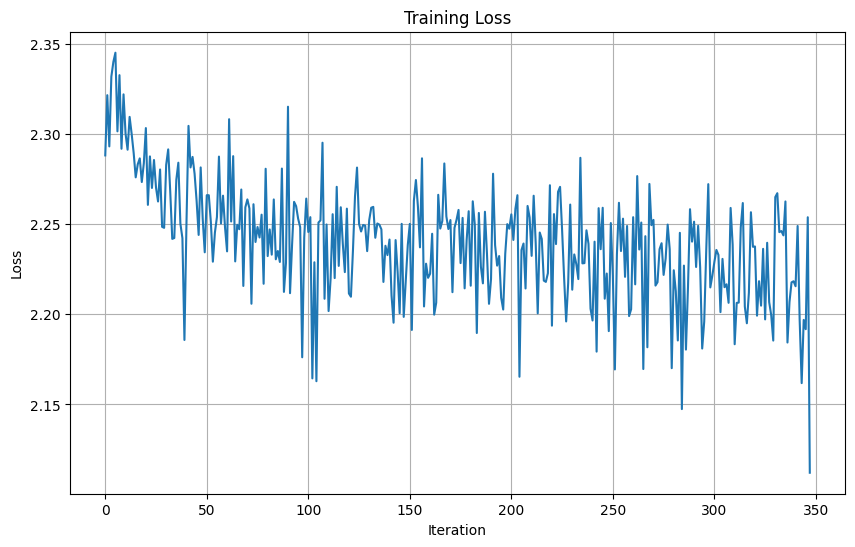

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

In [12]:
lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'abs']
lib = SYMBOLIC_LIB.keys()
model.auto_symbolic(lib=lib)

NameError: name 'SYMBOLIC_LIB' is not defined